In [44]:
# import the data
import pandas as pd

# read the data
data = pd.read_csv('multiple_housing_dataset.csv')

# print the first 5 rows of the data
print(data.head())

   Unnamed: 0  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0         459  3500         2          1        1      yes        no       no   
1         348  3150         2          2        1       no        no      yes   
2         290  2610         4          3        2       no        no       no   
3         512  3000         2          1        2      yes        no       no   
4          41  6360         3          2        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus    price  
0              no              no        0       no      unfurnished  3115000  
1              no              no        0       no   semi-furnished  3815000  
2              no              no        0       no   semi-furnished  4200000  
3              no              no        0       no        furnished  2520000  
4              no             yes        0      yes        furnished  7840000  


In [45]:
# create a new df with only area, bedrooms, and price   
df = data[['area', 'bedrooms','bathrooms', 'stories' 'price',]]
print(df.head())

   area  bedrooms  bathrooms    price
0  3500         2          1  3115000
1  3150         2          2  3815000
2  2610         4          3  4200000
3  3000         2          1  2520000
4  6360         3          2  7840000


In [46]:
# create X and y with normalizing
df['area'] = df['area']/df['area'].max()
df['bedrooms'] = df['bedrooms']/df['bedrooms'].max()
df['bathrooms'] = df['bathrooms']/df['bathrooms'].max()
df['price'] = df['price']/ df['price'].max()


# create X and y
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']



/var/folders/tx/67qpks5s7qn261k0v0hgqqdc0000gq/T/ipykernel_18178/3577511940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area']/df['area'].max()
/var/folders/tx/67qpks5s7qn261k0v0hgqqdc0000gq/T/ipykernel_18178/3577511940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'] = df['bedrooms']/df['bedrooms'].max()
/var/folders/tx/67qpks5s7qn261k0v0hgqqdc0000gq/T/ipykernel_18178/3577511940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [47]:
# fit using workspace MultipleLinearRegression

from MultipleLinearRegression import MultipleLinearRegression

X = df[['area', 'bedrooms', 'bathrooms']].values
y = df['price'].values
init_w = [0, 0, 0]
init_bias = 0
my_model = MultipleLinearRegression(init_w, init_bias)
my_model.vectorized_fit(X, y, 0.003, 1000)


 0 Cost: 0.074548 | w: [0.00053518 0.00064814 0.00049809] | b: 0.0010710000000000001
 100 Cost: 0.031062 | w: [0.04268649 0.05097442 0.03942334] | b: 0.08371022061592345
 200 Cost: 0.015829 | w: [0.06875682 0.08081288 0.06295483] | b: 0.13176260227229905
 300 Cost: 0.010475 | w: [0.08530875 0.09853776 0.07738062] | b: 0.15937076171480646
 400 Cost: 0.008574 | w: [0.0962227  0.10910052 0.08641875] | b: 0.1748968331210035
 500 Cost: 0.007882 | w: [0.10379312 0.11542885 0.0922676 ] | b: 0.18328509362587794
 600 Cost: 0.007612 | w: [0.10937677 0.11925381 0.09622706] | b: 0.18745892578704335
 700 Cost: 0.007490 | w: [0.11377595 0.1215989  0.09906575] | b: 0.18914680719041915
 800 Cost: 0.007421 | w: [0.11746512 0.12306931 0.10123815] | b: 0.18937069782208985
 900 Cost: 0.007370 | w: [0.12072492 0.12402286 0.10301301] | b: 0.18873481152782254


In [48]:
# Use sklearn to fit the model
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(X, y)


LinearRegression()

In [49]:
# print weights and bias from workspace model
print(my_model.w)
print(my_model.b)

# print weights and bias from sklearn model
print(sk_model.coef_)
print(sk_model.intercept_)

[0.12369232 0.12466567 0.10453474]
0.18760945181071323
[0.42297445 0.21270942 0.26205305]
-0.0715100257982283


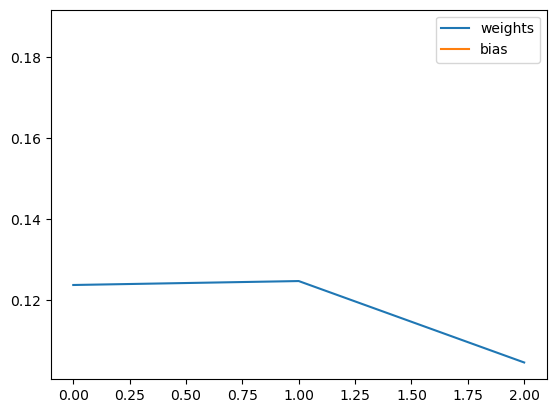

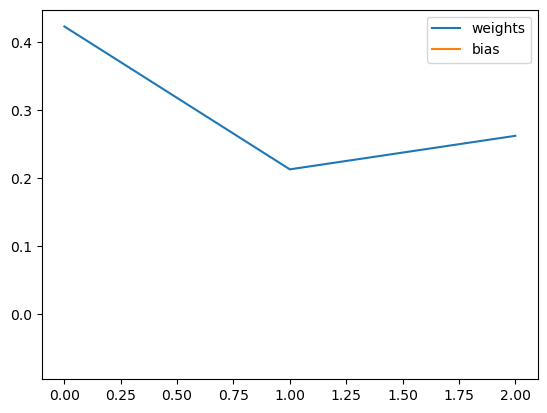

In [50]:
# plot the weights and bias from workspace model

import matplotlib.pyplot as plt

plt.plot(my_model.w, label='weights')
plt.plot(my_model.b, label='bias')
plt.legend()
plt.show()

# plot the weights and bias from sklearn model
plt.plot(sk_model.coef_, label='weights')
plt.plot(sk_model.intercept_, label='bias')
plt.legend()
plt.show()


In [51]:
# predict using both the models

# predict using workspace model
y_pred = my_model.predict(X)
print(y_pred)


[0.31106096 0.34203184 0.42076594 0.30552663 0.40249538 0.3123892
 0.38190767 0.37567525 0.33209142 0.32614298 0.33577272 0.35573028
 0.32810213 0.39889274 0.33488723 0.31271019 0.29640605 0.37927257
 0.33743302 0.36820584 0.33045976 0.38669508 0.40847246 0.33621547
 0.38497487 0.31659529 0.31703804 0.44995858 0.36314096 0.36421919
 0.41491443 0.31119378 0.31083958 0.42094609 0.37694815 0.46996083
 0.33762575 0.33045976 0.36349972 0.34706276 0.42942088 0.40515186
 0.40515186 0.35303983 0.30844875 0.4234438  0.38821224 0.37163519
 0.33873262 0.32415062 0.34703412 0.33278418 0.38522827 0.32722121
 0.37030695 0.40630875 0.37088902 0.3367689  0.36831459 0.3423639
 0.30757433 0.38857025 0.39023055 0.3641085  0.32323649 0.34374216
 0.4068408  0.404045   0.31349606 0.35754935 0.30552663 0.4391613
 0.331788   0.35038336 0.44234258 0.36529741 0.36366575 0.30202893
 0.34235857 0.34867878 0.45664979 0.35254707 0.44831965 0.331788
 0.4168026  0.33610478 0.4063908  0.37729128 0.31128233 0.32116208
